In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')

How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None


There are 4 columns and 7662 rows.  Column 1 is an object, column 2 is an integer, and columns 3 and 4 are floats.

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df= gdp_df.drop('Value Footnotes',axis=1)

In [5]:
gdp_df= gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})

In [6]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
min_year = gdp_df['Year'].min()
max_year = gdp_df['Year'].max()
print(min_year,max_year)

n = gdp_df.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n) #tells me how many countries are in the df and how many years

1990 2022
No.of.unique values in each column :
 Country            242
Year                33
GDP_Per_Capita    7624
dtype: int64


In [8]:
total_each_year= gdp_df.groupby('Year').count()
print(total_each_year['Country'])

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: Country, dtype: int64


In [9]:
missing_years = gdp_df.groupby("Country")["Year"].count()<33 
#this should be a list of countries with less than 33 years of data but need to figure out how to return a count value

print(missing_years[missing_years==True]) 


Country
Afghanistan                  True
Aruba                        True
Bhutan                       True
Bosnia and Herzegovina       True
Cambodia                     True
Cayman Islands               True
Croatia                      True
CuraÃ§ao                     True
Djibouti                     True
Estonia                      True
Hungary                      True
Iceland                      True
Israel                       True
Kosovo                       True
Kuwait                       True
Latvia                       True
Lebanon                      True
Liberia                      True
Libya                        True
Lithuania                    True
Maldives                     True
Moldova                      True
Montenegro                   True
Nauru                        True
Other small states           True
Palau                        True
Qatar                        True
San Marino                   True
Serbia                       True
Sint M

In [10]:
all_years=missing_years[missing_years==False].count()

print(all_years) #countries with data for all 33 years

202


In [11]:
some_years=missing_years[missing_years==True].count()
print(some_years) #countries missing at least one year of data

40


In [12]:
many_years=gdp_df.groupby("Country")["Year"].count()<=28 #defining 'many years' as at least 5 years 
print(many_years[many_years==True].count())
print(many_years[many_years==True])

29
Country
Afghanistan                  True
Cayman Islands               True
Croatia                      True
CuraÃ§ao                     True
Djibouti                     True
Estonia                      True
Iceland                      True
Israel                       True
Kosovo                       True
Latvia                       True
Liberia                      True
Libya                        True
Lithuania                    True
Maldives                     True
Moldova                      True
Montenegro                   True
Nauru                        True
Other small states           True
Palau                        True
Qatar                        True
San Marino                   True
Serbia                       True
Sint Maarten (Dutch part)    True
Slovenia                     True
Small states                 True
Somalia                      True
SÃ£o TomÃ© and Principe      True
Timor-Leste                  True
Turks and Caicos Islands     True
Nam

There are 202 countries with data for all 33 years and 29 countries missing at least 5 years of data. A lot of these countries have had some type of war or conflict in the past 33 years which could be why there is data missing.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

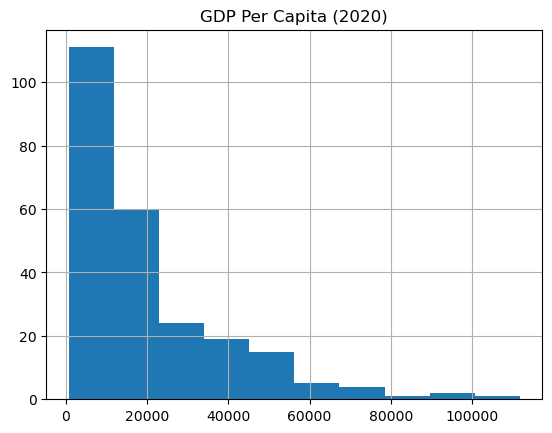

In [25]:
#histogram
gdp_2020=gdp_df[gdp_df['Year']==2020]
gdp_2020.hist('GDP_Per_Capita')
plt.title('GDP Per Capita (2020)')
plt.show()

Text(0.5, 1.0, 'GDP Per Capita (2020)')

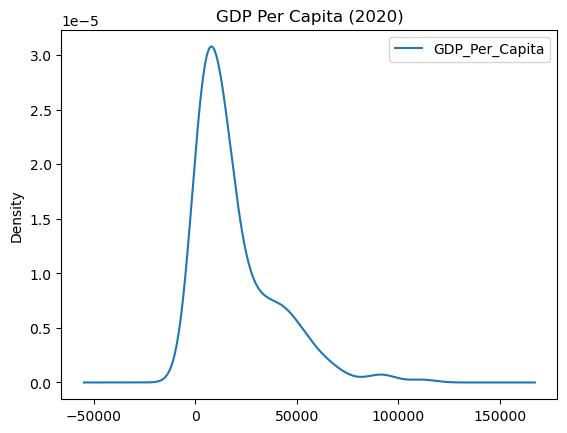

In [26]:
#density plot
gdp_2020.plot(kind='density',x='Country',y='GDP_Per_Capita')
plt.title('GDP Per Capita (2020)')


Text(0.5, 1.0, 'GDP Per Capita (2020)')

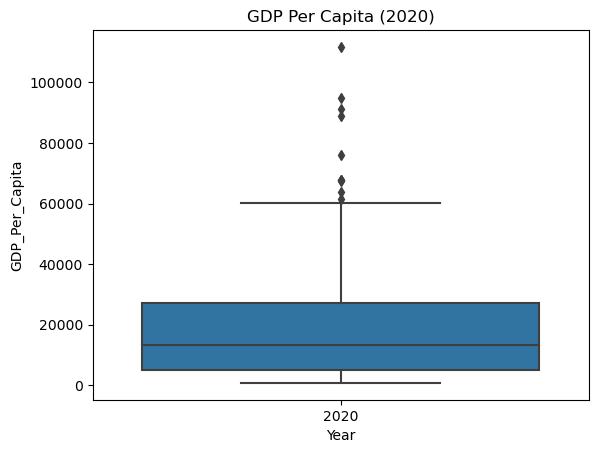

In [35]:
#boxplot
sns.boxplot(x='Year',y='GDP_Per_Capita',data=gdp_2020)
plt.title('GDP Per Capita (2020)')


Text(0.5, 1.0, 'GDP Per Capita (2020)')

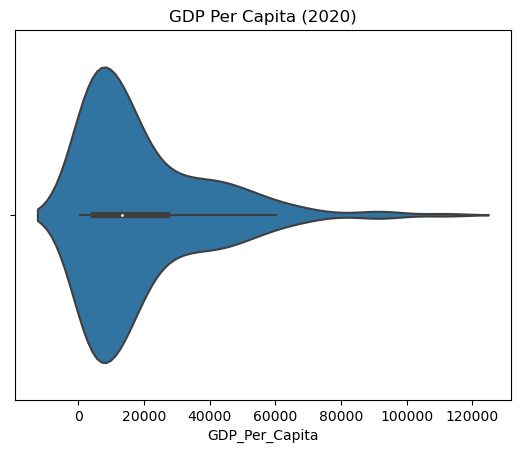

In [31]:
#violin plot
sns.violinplot(x='GDP_Per_Capita',data=gdp_2020)
plt.title('GDP Per Capita (2020)')


9. What was the median GDP per capita value in 2020?

In [44]:
median_gdp_2020=gdp_2020['GDP_Per_Capita'].median()
print('Median GDP Per Capita (2020) $',round(median_gdp_2020,2))

Median GDP Per Capita (2020) $ 13358.0


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [53]:
gdp_decades=gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]

print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


Text(0.5, 1.0, 'GDP Per Capita by Decade')

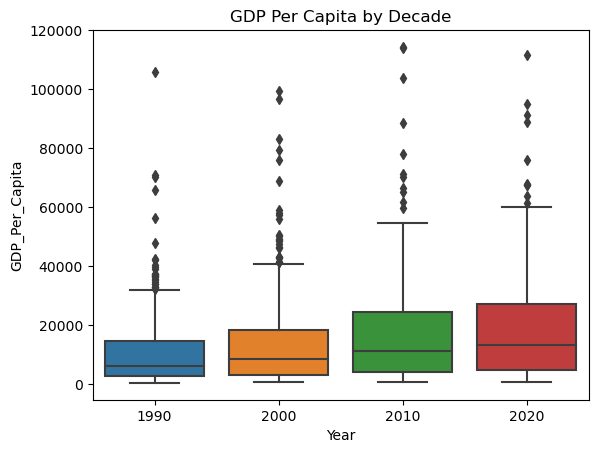

In [54]:
#boxplot
sns.boxplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.title('GDP Per Capita by Decade')

Text(0.5, 1.0, 'GDP Per Capita by Decade')

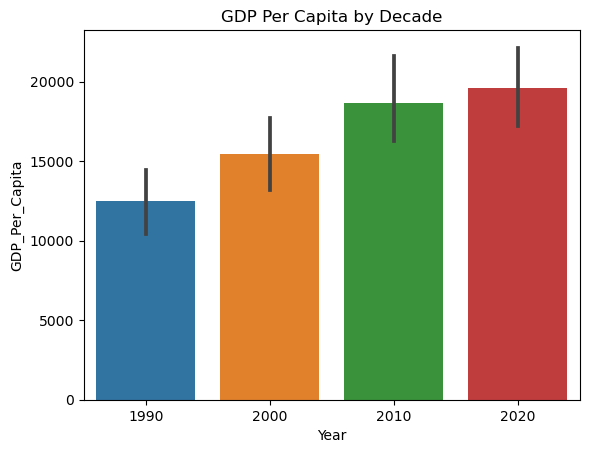

In [55]:
#barplot
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.title('GDP Per Capita by Decade')

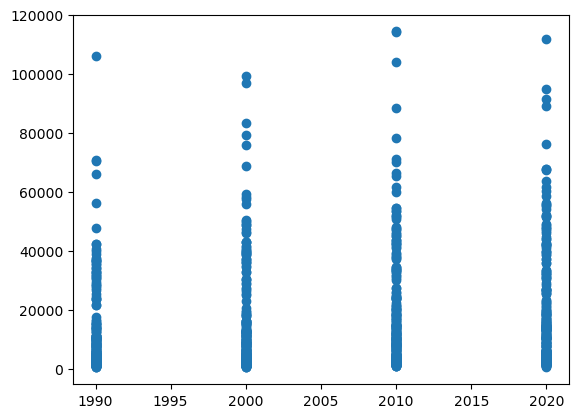

In [56]:
#scatterplot
plt.scatter(x='Year',y='GDP_Per_Capita',data=gdp_decades)
plt.title('GDP Per Capita by Decade')

In [ ]:
#scatterplot with a trend line

11. Which country was the first to have a GDP per capita greater than $100,000?

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.